In [1]:
from multi_path_base import *
#%matplotlib tk 
forecast_with_data=np.load('forecast_with_data.npy')

In [2]:
interpolation_points=200
x = np.arange(1,72+1,1)

y = forecast_with_data[35,:,1] #X[j,:]
tck = interpolate.splrep(x, y, s=0)

xnew=np.linspace(1,72,interpolation_points)
p_inter = interpolate.splev(xnew, tck, der=0)
p=p_inter

N=len(p_inter)
dt=1

real_1 = real(0.5, 0.3) 


In [3]:
M_test=np.array((100,500,1000,2000,5000,10000)) #,500,10000

models_M=[]
error_M=np.zeros((len(M_test),2))
for j in range(0,len(M_test)):

    disct_temp = disct(N,dt,M_test[j])
        
    X=gen_path_beta_robust(X0=0, disct=disct_temp,real=real_1, forecast=p )
        
    this_model=model_beta_flex(disct_temp,X, forecast=p )
    this_model.optimize()
        
    error_M[j]=this_model.get_error(real_1)
    
    del this_model
    #models_M.append(this_model)

In [6]:
error_M

array([[3.68409874, 0.78252058],
       [4.70927952, 0.82205638],
       [4.53587141, 0.8183364 ],
       [4.18856452, 0.80456864],
       [4.58755533, 0.81923915],
       [4.59630245, 0.81991427]])

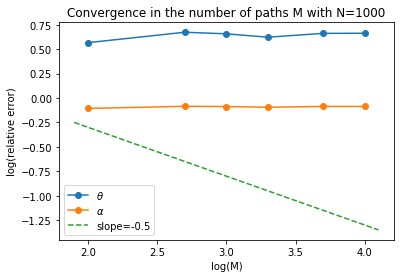

In [5]:
plt.title('Convergence in the number of paths M with N=1000')
plt.xlabel('log(M)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(M_test),  np.log10(error_M[:,0]),'-o', label='$\\theta$')
plt.plot(np.log10(M_test),  np.log10(error_M[:,1]) ,'-o', label='$\\alpha$')
abline(-0.5,0.7)
plt.legend()
plt.savefig('conv_M_real_forecast_beta.pdf')